In [1]:
%matplotlib notebook

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from data_analysis  import load_results, load_set_results, plot_energy, plot_magnetization, plot_abs_magnetization, plot_state, compute_statistics

In [3]:
simname = "sim_32"

In [4]:
final_state, t, J, h, T, e, m = load_results(simname)

<IPython.core.display.Javascript object>


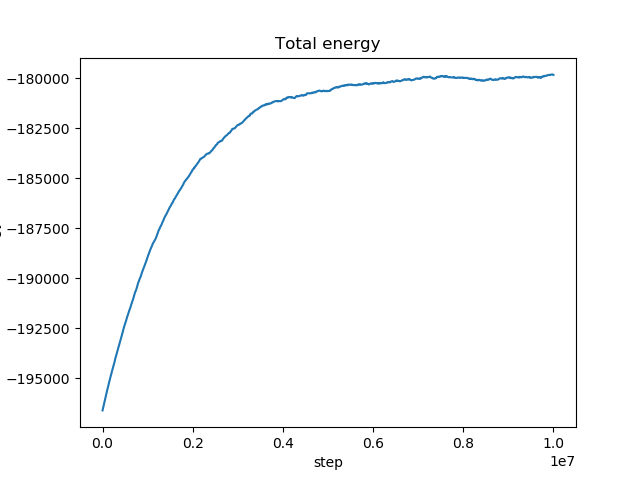

In [5]:
plot_energy(t, e).show()

<IPython.core.display.Javascript object>


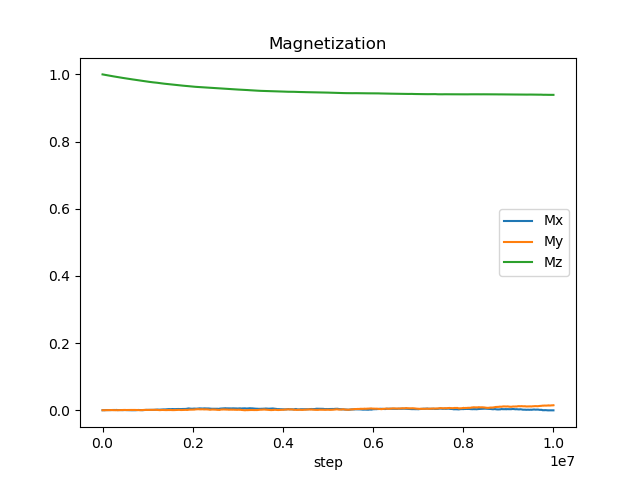

In [6]:
plot_magnetization(t, m).show()

<IPython.core.display.Javascript object>


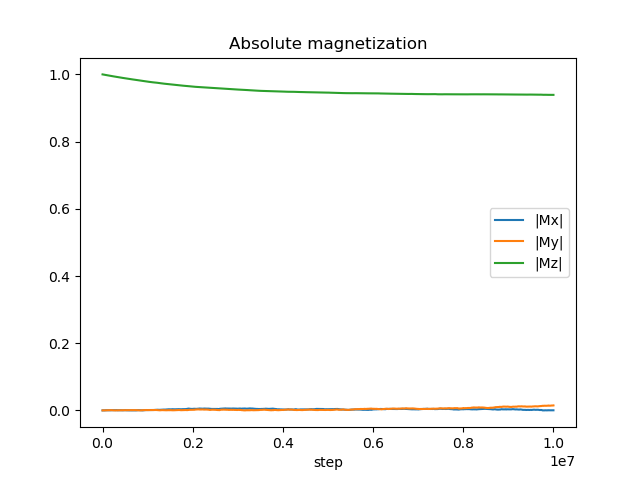

In [7]:
plot_abs_magnetization(t, m).show()

<IPython.core.display.Javascript object>


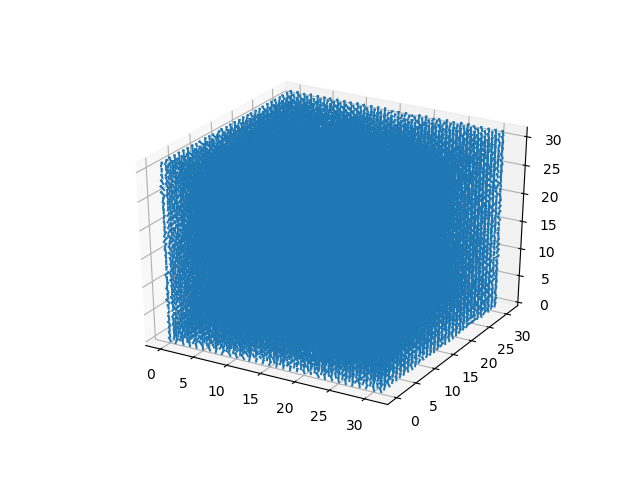

In [8]:
plot_state(final_state)

In [9]:
t0 = np.argmax(t==0.2e7)
compute_statistics(e[t0:], m[t0:,:])


{'e_mean': -180777.04424522797,
 'e_rmsd': 1154.404153139139,
 'm_mean': array([ 0.00356703,  0.00486567,  0.94573253]),
 'm_rmsd': array([ 0.00128303,  0.00379006,  0.00635298])}

#       SET RESULTS

In [10]:
final_state, t, J, h, T, e, m= load_set_results("prova")

In [11]:
T_final = T[:, -1]

In [12]:
e_final = e[:, -1]

<IPython.core.display.Javascript object>


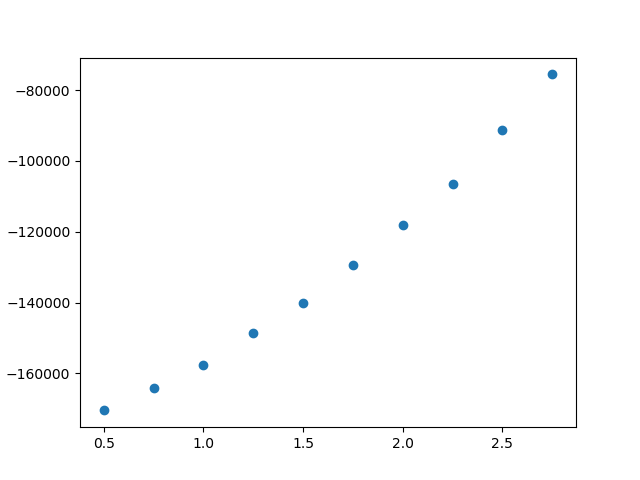

In [13]:
plt.figure()
plt.scatter(T_final, e_final)


In [14]:
m_final = m[:,-1]

In [15]:
m_magniture_final = np.sqrt(np.sum((m_final)**2, axis = 1))

<IPython.core.display.Javascript object>


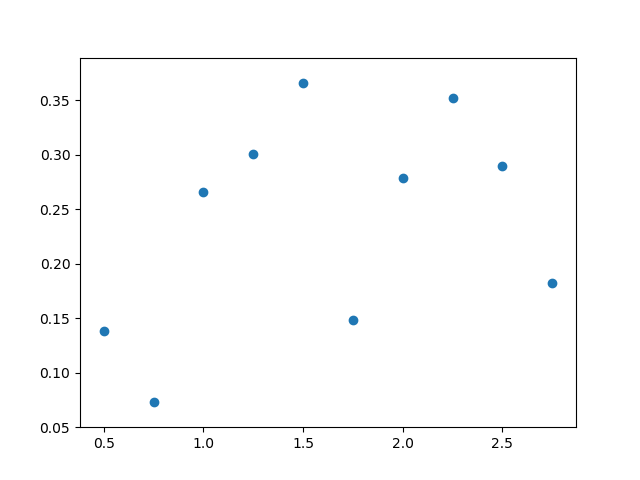

In [16]:
plt.figure()
plt.scatter(T_final, m_magniture_final)

In [17]:
T_final

array([ 0.5 ,  0.75,  1.  ,  1.25,  1.5 ,  1.75,  2.  ,  2.25,  2.5 ,  2.75])